In [2]:
import yfinance as yf
from pandas import MultiIndex, Int16Dtype
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import numpy as np
from scipy.ndimage import shift
import seaborn as sns
from tqdm import tqdm
import pandas as pd
from statsmodels.tools.sm_exceptions import ValueWarning, HessianInversionWarning, ConvergenceWarning
import warnings

In [3]:
ticker1 = "AMZN"
data1 = yf.Ticker(ticker1)
raw1 = data1.history(interval="1d",start = "2022-01-01", end = "2023-06-21")

ticker2 = "ULTA"
data2 = yf.Ticker(ticker2)
raw2 = data2.history(interval="1d",start = "2022-01-01", end = "2023-06-21")

ticker3 = "NOW"
data3 = yf.Ticker(ticker3)
raw3 = data3.history(interval="1d",start = "2022-01-01", end = "2023-06-21")

ticker4 = "MSFT"
data4 = yf.Ticker(ticker4)
raw4 = data4.history(interval="1d",start = "2022-01-01", end = "2023-06-21")

ticker5 = "SPY"
data5 = yf.Ticker(ticker4)
raw5 = data5.history(interval="1d",start = "2022-01-01", end = "2023-06-21")

In [6]:
tickerSymbol = 'SPY'
data = yf.Ticker(tickerSymbol)
dftrain = data.history(period = "3mo",interval="1d",start = "2023-07-16", end = "2023-07-17")
raw_prices = dftrain["Close"].dropna().to_numpy()
returns = dftrain["Close"].pct_change().dropna().to_numpy()
prices = dftrain["Close"]
print(f"Standard Deviation: {np.std(returns)}")
print(sm.tsa.adfuller(returns))
plt.plot(returns)
print(f"Shape: {returns.shape}")
plot_acf(returns)
plt.show()
plot_pacf(returns,lags=10)
plt.show()
print(returns.shape)

ERROR SPY: No price data found, symbol may be delisted (1d 2023-07-16 -> 2023-07-17)


Standard Deviation: nan


/Users/hamza/miniconda3/envs/tf/lib/python3.9/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/hamza/miniconda3/envs/tf/lib/python3.9/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/hamza/miniconda3/envs/tf/lib/python3.9/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


ValueError: zero-size array to reduction operation maximum which has no identity

In [5]:
print(dftrain)

                                 Open        High         Low       Close  \
Date                                                                        
2023-07-10 00:00:00-04:00  438.179993  439.839996  437.589996  439.660004   
2023-07-11 00:00:00-04:00  440.450012  442.970001  439.440002  442.459991   
2023-07-12 00:00:00-04:00  446.390015  447.480011  444.910004  446.019989   
2023-07-13 00:00:00-04:00  447.899994  450.380005  447.450012  449.559998   
2023-07-14 00:00:00-04:00  450.480011  451.359985  448.489990  449.279999   

                             Volume  Dividends  Stock Splits  Capital Gains  
Date                                                                         
2023-07-10 00:00:00-04:00  62443500        0.0           0.0            0.0  
2023-07-11 00:00:00-04:00  64463800        0.0           0.0            0.0  
2023-07-12 00:00:00-04:00  91924500        0.0           0.0            0.0  
2023-07-13 00:00:00-04:00  72425200        0.0           0.0          

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   86
Model:                 ARIMA(5, 0, 5)   Log Likelihood                 206.419
Date:                Thu, 22 Jun 2023   AIC                           -388.838
Time:                        15:36:28   BIC                           -359.386
Sample:                             0   HQIC                          -376.985
                                 - 86                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0004      0.003     -0.116      0.907      -0.006       0.006
ar.L1         -0.1065      0.527     -0.202      0.840      -1.140       0.927
ar.L2         -0.1355      0.535     -0.253      0.8

/Users/hamza/miniconda3/envs/tf/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


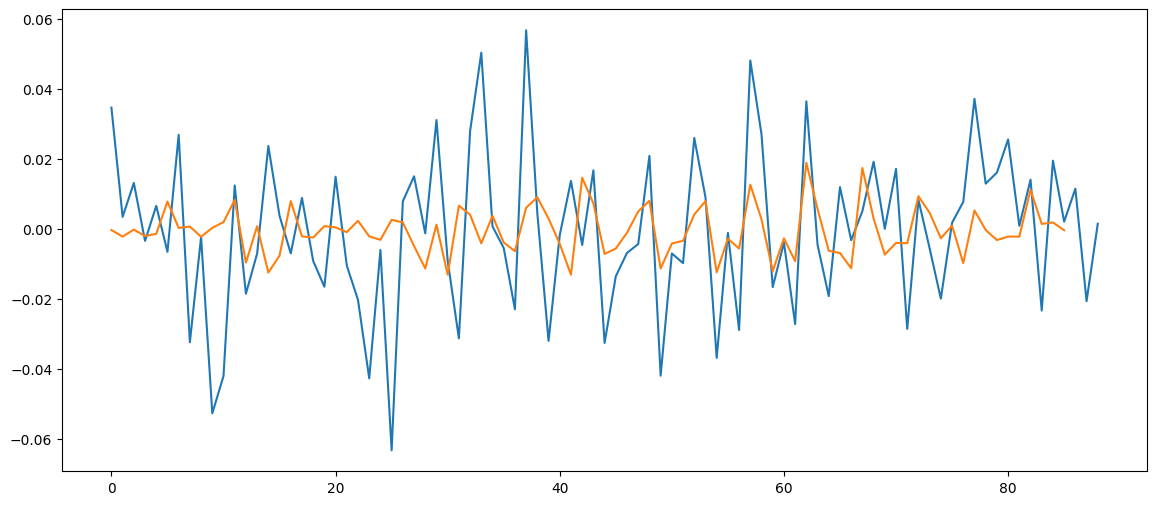

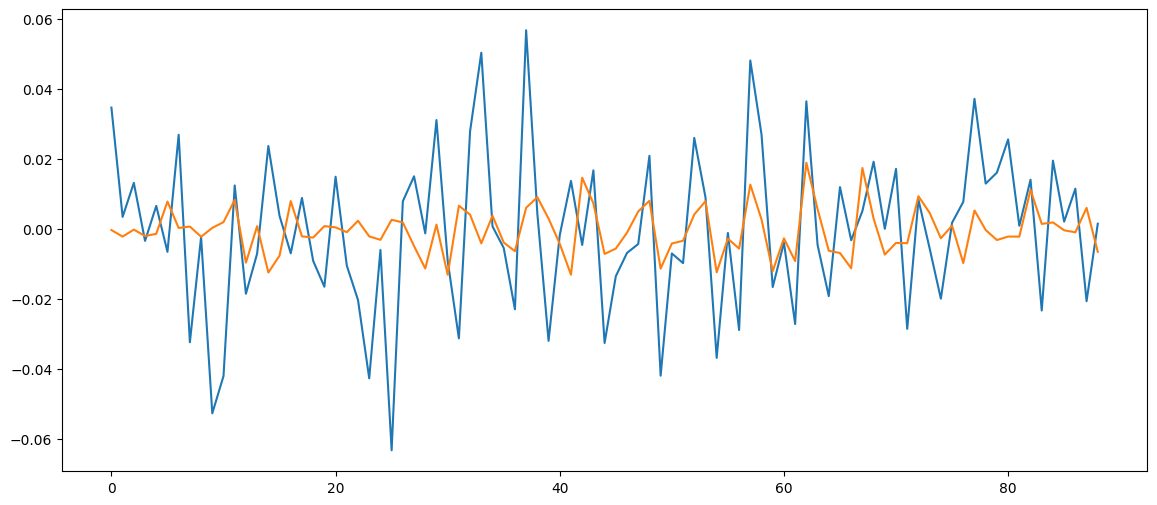

In [52]:
arma_mod = sm.tsa.ARIMA(returns[0:86], order=(5,0,5))
results = arma_mod.fit()
print(results.summary())
figure(figsize=(14, 6))
plt.plot(returns)
plt.plot(results.fittedvalues)
figure(figsize=(14, 6))
plt.plot(returns)
plt.plot(results.predict(start = 0, end = 88))